In [2]:
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from tqdm.autonotebook import tqdm

/Users/maxim/anaconda3/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [72]:
spec = pd.read_csv("../data-science-bowl-2019/specs.csv")
train = pd.read_csv("../data-science-bowl-2019/train.csv")
train_labels = pd.read_csv("../data-science-bowl-2019/train_labels.csv")
test = pd.read_csv("../data-science-bowl-2019/test.csv")

In [4]:
def retro_data(X, time_data):
    idx = list(np.linspace(0, len(time_data)-1, len(time_data), dtype = int))
    result = [v for v, t in
          sorted(zip(idx, time_data), key=lambda vt: vt[1])]
    return X[result]

# Spec

In [5]:
spec

,event_id,info,args
0,2b9272f4,The end of system-initiated feedback (Correct)...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
1,df4fe8b6,The end of system-initiated feedback (Incorrec...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
2,3babcb9b,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
3,7f0836bf,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
4,ab3136ba,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
...,...,...,...
381,29f54413,The start round event is triggered at the star...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
382,06372577,The start tutorial event is triggered at the s...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
383,2a444e03,This event occurs when the player picks up a w...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
384,9e6b7fb5,This event occurs when the player clicks on th...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."


In [6]:
var = dict(Counter(spec["info"].values))

In [7]:
len(var.keys())

168

(array([121.,  17.,   2.,   5.,   2.,   9.,   4.,   0.,   1.,   0.,   1.,
          0.,   0.,   1.,   2.,   3.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17.]),
 <a list of 16 Patch objects>)

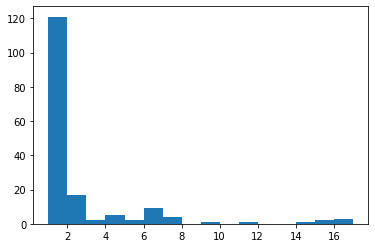

In [8]:
plt.hist(list(var.values()), bins = 16)

In [9]:
list(var.keys())[0]

'The end of system-initiated feedback (Correct) event occurs when the game finishes delivering feedback to the player in response to a correct round attempt (pressing the go button with the correct answer). It contains information that describes the duration and content of the instruction, and will likely occur in conjunction with a beat round event. These events are used to determine the effectiveness of the feedback. We can answer questions like, "how much time elapsed while the game was presenting feedback?"'

In [10]:
spec["args"][0]

'[{"name":"game_time","type":"int","info":"millisecond count since start of game"},{"name":"round","type":"int","info":"number of the current round when the event takes place or 0 if no round"},{"name":"level","type":"int","info":"number of the current level when the event takes place or 0 if no level"},{"name":"description","type":"string","info":"the text or description of the instruction"},{"name":"identifier","type":"string","info":"a unique identifier for this piece of instruction"},{"name":"media_type","type":"string","info":"the type of media that has just played:\\n\'audio\' || \'animation\' || \'other\'"},{"name":"duration","type":"int","info":"the duration of the media playback in milliseconds"},{"name":"event_count","type":"int","info":"session event counter"},{"name":"event_code","type":"int","info":"event class identifier"}]'

([array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

/Users/maxim/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/maxim/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0, flags=flags)


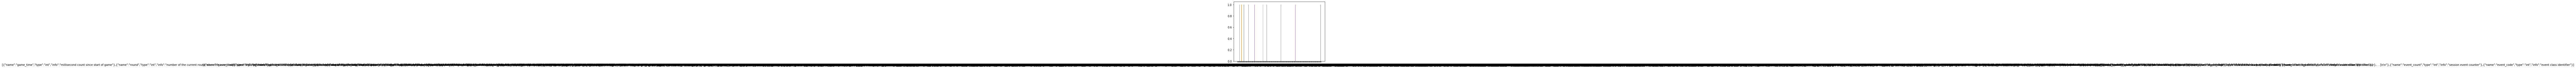

In [11]:
plt.hist(list(spec["args"].values), bins = 24)

# train

In [12]:
train["timestamp"] = pd.to_numeric(pd.to_datetime(train["timestamp"]))

In [13]:
retro_train = pd.DataFrame(retro_data(train.values, train["timestamp"].values), columns=train.columns)

In [15]:
retro_train["game_session"] = retro_train["game_session"].apply(lambda x : int(x, 16))
retro_train["installation_id"] = retro_train["installation_id"].apply(lambda x : int(x, 16))
retro_train["event_id"] = retro_train["event_id"].apply(lambda x : int(x, 16))

In [34]:
retro_train

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,656751580,6890500556105754607,1563847937279000000,"{""event_code"": 2000, ""event_count"": 1}",1535270953,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,656751580,11513007078330821261,1563847973427000000,"{""event_code"": 2000, ""event_count"": 1}",1535270953,1,2000,0,Tree Top City - Level 1,Clip,TREETOPCITY
2,656751580,1087770658238878759,1563848067038000000,"{""event_code"": 2000, ""event_count"": 1}",1535270953,1,2000,0,Ordering Spheres,Clip,TREETOPCITY
3,656751580,16938479587897083942,1563849471719000000,"{""event_code"": 2000, ""event_count"": 1}",1535270953,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
4,656751580,13697118657592514816,1563892705256000000,"{""event_code"": 2000, ""event_count"": 1}",1441761300,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
...,...,...,...,...,...,...,...,...,...,...,...
11341037,909936329,6193365487831984796,1571766103854000000,"{""source"":""resources"",""coordinates"":{""x"":774,""...",3689730078,37,4035,33581,Bug Measurer (Activity),Activity,TREETOPCITY
11341038,168301468,6193365487831984796,1571766103855000000,"{""description"":""Let's put this bug back where ...",3689730078,38,3010,33581,Bug Measurer (Activity),Activity,TREETOPCITY
11341039,3885971299,6193365487831984796,1571766104052000000,"{""bug"":""grassHopper"",""source"":""resources"",""coo...",3689730078,39,4030,33741,Bug Measurer (Activity),Activity,TREETOPCITY
11341040,909936329,6193365487831984796,1571766105786000000,"{""source"":""resources"",""coordinates"":{""x"":527,""...",3689730078,40,4035,35558,Bug Measurer (Activity),Activity,TREETOPCITY


In [76]:
gr_data = retro_train.groupby(by = ['installation_id', "game_session"])

In [77]:
gr_data.ngroups

303319

In [79]:
example = gr_data.get_group(("0006a69f", "6bdf9623adc94d89"))

In [86]:
for i in example.index:
    print(example.loc[i, "event_data"])

{"version":"1.0","event_count":1,"game_time":0,"event_code":2000}
{"event_count":2,"game_time":77,"event_code":2025}
{"description":"Pull three mushrooms out of the ground and order them from shortest to tallest!","identifier":"Dot_PullMushrooms","media_type":"audio","total_duration":3000,"event_count":3,"game_time":77,"event_code":3010}
{"coordinates":{"x":199,"y":484,"stage_width":1015,"stage_height":762},"event_count":4,"game_time":2784,"event_code":4070}
{"height":1,"coordinates":{"x":171,"y":519,"stage_width":1015,"stage_height":762},"event_count":5,"game_time":3625,"event_code":4025}
{"description":"Pull three mushrooms out of the ground and order them from shortest to tallest!","identifier":"Dot_PullMushrooms","media_type":"audio","duration":3548,"event_count":6,"game_time":3625,"event_code":3110}
{"description":"That's one!","identifier":"Dot_ThatsOne","media_type":"audio","total_duration":600,"event_count":7,"game_time":3625,"event_code":3021}
{"description":"That's one!","ide

In [16]:
idxes = list(retro_train.index.values)

In [17]:
def for_sort(i1, i2):
    if (retro_train.loc[i1, "installation_id"] != retro_train.loc[i1, "installation_id"]):
        return retro_train.loc[i1, "installation_id"] < retro_train.loc[i1, "installation_id"]
    else :
        if (retro_train.loc[i1, "game_session"] != retro_train.loc[i1, "game_session"]):
            return retro_train.loc[i1, "game_session"] < retro_train.loc[i1, "game_session"]
        else:
            return retro_train.loc[i1, "timestamp"] < retro_train.loc[i1, "timestamp"]
    

In [23]:
def print_statistics(data):
    print("Maximum is " + str(data.max()))
    print("Minimum is " + str(data.min()))
    print("Distance is " + str((data.max() - data.min())/len(data)))

In [24]:
print_statistics(retro_train["installation_id"])

Maximum is 4294706563
Minimum is 125199
Distance is 378.67608320293675


In [25]:
print_statistics(retro_train["game_session"])

Maximum is 18446652689798089275
Minimum is 13517842038799
Distance is 1626538299739.658


In [26]:
print_statistics(retro_train["timestamp"])

Maximum is 1571766105983000000
Minimum is 1563847937279000000
Distance is 698187054.0643444


In [21]:
retro_train["timestamp"].max()

1571766105983000000

In [42]:
for i in tqdm(range(len(idxes)-1)):
    for j in tqdm(range(i, len(idxes)-1)):
        if for_sort(i, j):
            idxes[j], idxes[i] = idxes[i], idxes[j]

KeyboardInterrupt: 

# train_labels

In [40]:
train_labels

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.000000,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.000000,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.000000,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.500000,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.000000,3
...,...,...,...,...,...,...,...
17685,c996482b11d149dd,ffc90c32,Bird Measurer (Assessment),1,0,1.000000,3
17686,b05a02b52d5c1f4c,ffd2871d,Cauldron Filler (Assessment),1,0,1.000000,3
17687,5448d652309a6324,ffeb0b1b,Cauldron Filler (Assessment),1,2,0.333333,1
17688,a6885ab824fbc32c,ffeb0b1b,Mushroom Sorter (Assessment),0,1,0.000000,0


In [41]:
test["timestamp"] = pd.to_numeric(pd.to_datetime(test["timestamp"]))

In [42]:
retro_test = pd.DataFrame(retro_data(test.values, test["timestamp"].values), columns=test.columns)

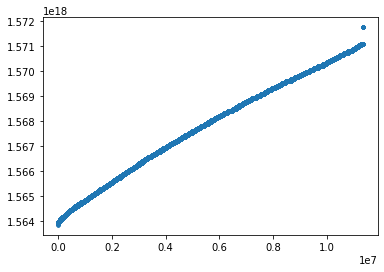

In [43]:
plt.plot(retro_train["timestamp"], ".")
# plt.plot(retro_train["timestamp"], ".")

In [44]:

retro_train = train.sort_index(by = "timestamp")

/Users/maxim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [45]:
retro_train

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
4152505,27253bdc,5f9ff9bf9350a7ef,1563847937279000000,"{""event_code"": 2000, ""event_count"": 1}",5b826029,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
4152506,27253bdc,9fc66af070776a8d,1563847973427000000,"{""event_code"": 2000, ""event_count"": 1}",5b826029,1,2000,0,Tree Top City - Level 1,Clip,TREETOPCITY
4152507,27253bdc,0f1889a6816bd427,1563848067038000000,"{""event_code"": 2000, ""event_count"": 1}",5b826029,1,2000,0,Ordering Spheres,Clip,TREETOPCITY
4152508,27253bdc,eb119170f7cf8826,1563849471719000000,"{""event_code"": 2000, ""event_count"": 1}",5b826029,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
3926440,27253bdc,be15f0d9402d5900,1563892705256000000,"{""event_code"": 2000, ""event_count"": 1}",55ef8814,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
...,...,...,...,...,...,...,...,...,...,...,...
9850786,363c86c9,55f34118ea63aa9c,1571766103854000000,"{""source"":""resources"",""coordinates"":{""x"":774,""...",dbecd01e,37,4035,33581,Bug Measurer (Activity),Activity,TREETOPCITY
9850787,0a08139c,55f34118ea63aa9c,1571766103855000000,"{""description"":""Let's put this bug back where ...",dbecd01e,38,3010,33581,Bug Measurer (Activity),Activity,TREETOPCITY
9850788,e79f3763,55f34118ea63aa9c,1571766104052000000,"{""bug"":""grassHopper"",""source"":""resources"",""coo...",dbecd01e,39,4030,33741,Bug Measurer (Activity),Activity,TREETOPCITY
9850789,363c86c9,55f34118ea63aa9c,1571766105786000000,"{""source"":""resources"",""coordinates"":{""x"":527,""...",dbecd01e,40,4035,35558,Bug Measurer (Activity),Activity,TREETOPCITY


In [46]:
sorte = np.sort(train["timestamp"].values)
sorte_t = retro_train["timestamp"].values

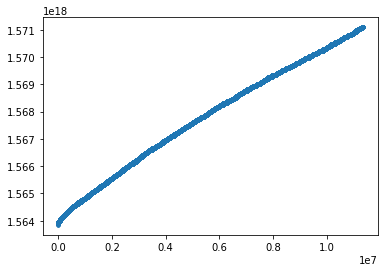

In [47]:

plt.plot(sorte_t[:-41], ".")

In [48]:
 nes = Counter(train["installation_id"].values)

In [49]:
len(list(nes.keys()))

17000

(array([1.6713e+04, 2.3700e+02, 3.1000e+01, 9.0000e+00, 5.0000e+00,
        4.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00000e+00, 5.89970e+03, 1.17984e+04, 1.76971e+04, 2.35958e+04,
        2.94945e+04, 3.53932e+04, 4.12919e+04, 4.71906e+04, 5.30893e+04,
        5.89880e+04]),
 <a list of 10 Patch objects>)

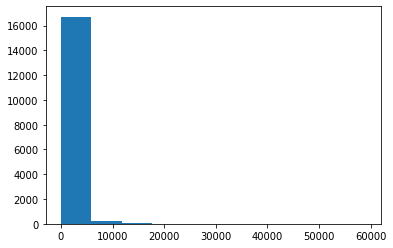

In [50]:
plt.hist(list(nes.values()))

In [51]:
train_labels.groupby("installation_id")["accuracy_group"].mean()

installation_id
0006a69f    2.200000
0006c192    1.666667
00129856    3.000000
001d0ed0    1.600000
00225f67    0.000000
              ...   
ff9305d7    0.500000
ff9715db    2.333333
ffc90c32    2.666667
ffd2871d    3.000000
ffeb0b1b    0.666667
Name: accuracy_group, Length: 3614, dtype: float64

In [52]:
train_labels

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.000000,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.000000,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.000000,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.500000,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.000000,3
...,...,...,...,...,...,...,...
17685,c996482b11d149dd,ffc90c32,Bird Measurer (Assessment),1,0,1.000000,3
17686,b05a02b52d5c1f4c,ffd2871d,Cauldron Filler (Assessment),1,0,1.000000,3
17687,5448d652309a6324,ffeb0b1b,Cauldron Filler (Assessment),1,2,0.333333,1
17688,a6885ab824fbc32c,ffeb0b1b,Mushroom Sorter (Assessment),0,1,0.000000,0


In [53]:
tes = Counter(test["installation_id"].values)

In [54]:
len(list(tes.keys()))

1000

In [55]:

cnt = 0
for i in list(tes.keys()):
    
    if i in  list(nes.keys()):
        cnt += 1

In [56]:
cnt

0

In [57]:
event = Counter(train["event_data"].values)


(array([1.0893746e+07, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]),
 array([1.000000e+00, 1.836850e+04, 3.673600e+04, 5.510350e+04,
        7.347100e+04, 9.183850e+04, 1.102060e+05, 1.285735e+05,
        1.469410e+05, 1.653085e+05, 1.836760e+05]),
 <a list of 10 Patch objects>)

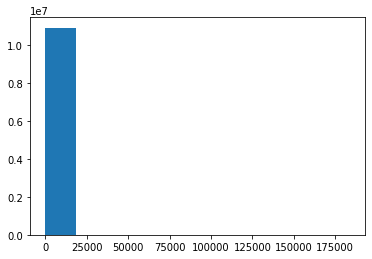

In [58]:
plt.hist(list(event.values()))

In [59]:
stop_keys = []
for key in list(event.keys()):
    if event[key] >6000:
        print(key)
        stop_keys.append(key)

{"event_code": 2000, "event_count": 1}
{"version":"1.0","event_count":1,"game_time":0,"event_code":2000}
{"version":"1.0","level":0,"round":0,"event_count":1,"game_time":0,"event_code":2000}
{"version":"1.0","round":0,"event_count":1,"game_time":0,"event_code":2000}
{"description":"Let's set off these fireworks. We can drag them to any height we want!","identifier":"Dot_LetsFireworks,Dot_DragAnyHeight","media_type":"audio","total_duration":3885,"event_count":2,"game_time":0,"event_code":3010}
{"version":"1","round":0,"event_count":1,"game_time":0,"event_code":2000}


In [60]:
stop_keys

['{"event_code": 2000, "event_count": 1}',
 '{"version":"1.0","event_count":1,"game_time":0,"event_code":2000}',
 '{"version":"1.0","level":0,"round":0,"event_count":1,"game_time":0,"event_code":2000}',
 '{"version":"1.0","round":0,"event_count":1,"game_time":0,"event_code":2000}',
 '{"description":"Let\'s set off these fireworks. We can drag them to any height we want!","identifier":"Dot_LetsFireworks,Dot_DragAnyHeight","media_type":"audio","total_duration":3885,"event_count":2,"game_time":0,"event_code":3010}',
 '{"version":"1","round":0,"event_count":1,"game_time":0,"event_code":2000}']

In [61]:
nes_data = retro_train["event_data"].apply(lambda x: x not in stop_keys)

In [62]:
idx = nes_data.index.values[nes_data.values]

In [63]:
idx

array([3926443, 3926444, 3926445, ..., 9850788, 9850789, 9850790])

In [66]:
nes_data = retro_train.iloc[idx]

In [68]:
nes_data

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
5068473,5c3d2b2f,de2171c72543816b,1566912876007000000,"{""size"":4,""item_type"":""Tub"",""position"":3,""anim...",71c910b9,69,4020,90656,Scrub-A-Dub,Game,MAGMAPEAK
1387960,1bb5fbdb,f9786e9ca4b3f302,1566912876250000000,"{""description"":""Drag the shovel to the molds t...",1f67e004,55,3110,33651,Sandcastle Builder (Activity),Activity,MAGMAPEAK
1387961,5e812b27,f9786e9ca4b3f302,1566912876551000000,"{""size"":0,""coordinates"":{""x"":782,""y"":207,""stag...",1f67e004,56,4030,33929,Sandcastle Builder (Activity),Activity,MAGMAPEAK
1387962,c58186bf,f9786e9ca4b3f302,1566912876658000000,"{""size"":0,""coordinates"":{""x"":782,""y"":207,""stag...",1f67e004,57,4035,34051,Sandcastle Builder (Activity),Activity,MAGMAPEAK
1387963,1325467d,f9786e9ca4b3f302,1566912876769000000,"{""coordinates"":{""x"":852,""y"":223,""stage_width"":...",1f67e004,58,4070,34151,Sandcastle Builder (Activity),Activity,MAGMAPEAK
...,...,...,...,...,...,...,...,...,...,...,...
3864173,a0faea5d,e8dc0439ca560be1,1570233504848000000,"{""coordinates"":{""x"":426,""y"":164,""stage_width"":...",547d0e1c,52,4070,75314,Bubble Bath,Game,MAGMAPEAK
5200696,87d743c1,5826e6001f3520ca,1570233505061000000,"{""coordinates"":{""x"":547,""y"":453,""stage_width"":...",73a5310e,2,4010,2397,Dino Dive,Game,MAGMAPEAK
3490154,5e3ea25a,33d5fecd684f94dc,1570233505582000000,"{""coordinates"":{""x"":922,""y"":390,""stage_width"":...",4d7d3d97,89,4070,70579,Crystals Rule,Game,TREETOPCITY
3490155,3babcb9b,33d5fecd684f94dc,1570233506076000000,"{""description"":""1"",""identifier"":""count1"",""medi...",4d7d3d97,90,3110,71079,Crystals Rule,Game,TREETOPCITY


In [67]:
gr_data = nes_data.groupby(by = ["installation_id", "game_session"])

In [69]:
gr_data.ngroups

298094

In [70]:
train_labels.groupby(by = ["installation_id", "game_session"]).ngroups

17690

In [75]:
test.groupby(by = ["installation_id", "game_session"]).ngroups

28445